# Гарапко Даниил, группа 858641

# Лабораторная работа №2 “Логистическая регрессия. Многоклассовая классификация”

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy import optimize
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

## Task 1

Набор данных ex2data1.txt представляет собой текстовый файл,
содержащий информацию об оценке студента по первому экзамену (первое
число в строке), оценке по второму экзамену (второе число в строке) и
поступлении в университет (0 - не поступил, 1 - поступил).

1. Загрузите данные ex2data1.txt из текстового файла.

In [0]:
task1_file_name = "Data\Lab 2\ex2data1.txt"
df_task1 = pd.read_csv(task1_file_name)
df_task1.columns = ['mark_1', 'mark_2', 'is_student']

2. Постройте график, где по осям откладываются оценки по предметам, а
точки обозначаются двумя разными маркерами в зависимости от того,
поступил ли данный студент в университет или нет.

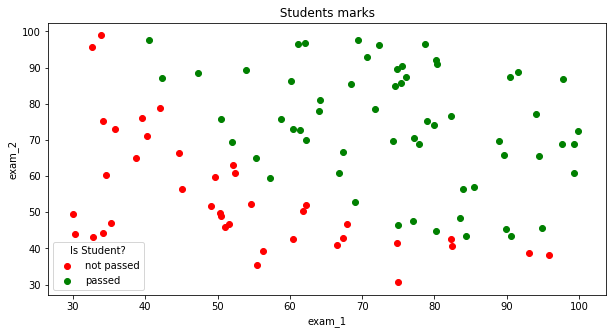

In [0]:
groups = df_task1.groupby('is_student')
colors = {0:'red', 1:'green'}
labels = {0:'not passed', 1:'passed'}

fig, ax = plt.subplots(figsize=(10, 5))

for label, group in groups:
    ax.scatter(group['mark_1'], group['mark_2'], c=colors[label], label=labels[label])
ax.set(xlabel='exam_1', ylabel='exam_2', title=' Students marks ')
ax.legend(title='Is Student?')
plt.show()

3. Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.

In [0]:
def normalize(data):
    min_value = np.min(data, axis=0)
    max_value = np.max(data, axis=0)
    average = np.average(data, axis=0)
    range_values = max_value - min_value
    return (data - average) / range_values, range_values, average

def denormalize_theta(t, range_values, average):
    t_denormalized = np.empty(shape=theta.shape)
    t_denormalized[0,0]=theta[0]-(theta[1:,0] * average / range_values).sum() #free member
    t_denormalized[1:,0]=theta[1:,0]/np.array(range_values)
    return t_denormalized

In [0]:
alpha = 5.0
n = df_task1.shape[1] #po x 
m = df_task1.shape[0] #po y 
normalized_data, range_values, average = normalize(df_task1.iloc[:,:-1])
x = np.ones(df_task1.shape)
x[:, 1:] = normalized_data
x = x.T
y = np.array(df_task1.iloc[:,-1], subok=True, ndmin=2).T
# theta = np.random.random((n, 1))
theta = np.array([[1.2],[10.0],[10.0]])

In [0]:
theta.shape

(3, 1)

График нормализованных данных

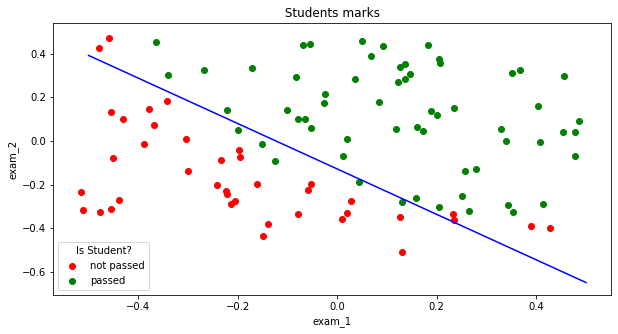

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

for label, group in groups:
    ax.scatter((group['mark_1']-average[0])/range_values[0], (group['mark_2']-average[0])/range_values[0], c=colors[label], label=labels[label])
ax.set(xlabel='exam_1', ylabel='exam_2', title=' Students marks ')
ax.legend(title='Is Student?')
plt.show()

Функции потерь J(θ) и градиентного спуска для логистической регрессии

In [0]:
g = lambda z: 1 / (1 + np.exp(-z))
lost_func = lambda t, x, y: (-1 / m) * (np.dot(y.T,np.log(g(np.dot(t.T, x)).T)) + np.dot((1 - y).T, np.log(1 - g(np.dot(t.T, x)).T)))
update_func = lambda t, x, y: t - (1 / m) * alpha * np.dot((g(np.dot(t.T, x)).T - y).T, x.T).T
J = lambda t: lost_func(t.T, x, y)
gradiate =  lambda t: list(((1 / m) * np.dot((g(np.dot(t, x)).T - y).T, x.T))[0])

In [0]:
step = 0
costs = []
for i in range(10000):
    theta = update_func(theta, x, y)
    cost = lost_func(theta, x, y)[0,0]
    costs.append(cost)

In [0]:
step, theta

(0, array([[ 1.75739287],
        [14.18976304],
        [13.64516072]]))

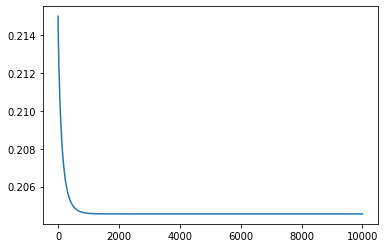

In [0]:
plt.plot(np.array([range(1, 10001)]).T, costs)
plt.show()

In [0]:
lost_func(theta, x, y).item()

0.20455739660229239

4. Реализуйте другие методы (как минимум 2) оптимизации для
реализованной функции стоимости (например, Метод Нелдера —
Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно,
генетические методы и т.п.). Разрешается использовать библиотечные
реализации методов оптимизации (например, из библиотеки scipy).

In [0]:
optimize.minimize(J, np.array([[1.0, 0.2, 0.1]]).T, method='Nelder-Mead')

 final_simplex: (array([[ 1.75739178, 14.18973702, 13.64512602],
       [ 1.75739094, 14.18979294, 13.64518322],
       [ 1.75739988, 14.18980946, 13.64519058],
       [ 1.75739479, 14.18971315, 13.64513511]]), array([0.2045574, 0.2045574, 0.2045574, 0.2045574]))
           fun: 0.204557396603129
       message: 'Optimization terminated successfully.'
          nfev: 254
           nit: 141
        status: 0
       success: True
             x: array([ 1.75739178, 14.18973702, 13.64512602])

In [0]:
optimize.minimize(J, np.array([[1.0, 0.2, 0.1]]).T, method='BFGS')

      fun: 0.2045573967215396
 hess_inv: array([[  28.12078202,  112.48935165,  122.32453613],
       [ 112.48935165, 1023.96628513,  928.50529044],
       [ 122.32453613,  928.50529044, 1070.95848839]])
      jac: array([ 2.90758908e-06,  4.93600965e-07, -7.13393092e-07])
  message: 'Optimization terminated successfully.'
     nfev: 145
      nit: 28
     njev: 29
   status: 0
  success: True
        x: array([ 1.75745348, 14.18998781, 13.64523016])

In [0]:
optimize.brute(J, ((0, 2), (5,20), (5, 20)), disp=True)

Optimization terminated successfully.
         Current function value: 0.204557
         Iterations: 74
         Function evaluations: 132


array([ 1.75739679, 14.18974063, 13.64514232])

In [0]:
optimize.differential_evolution(J, ((0, 2), (5,20), (5, 20)), disp=True)

differential_evolution step 1: f(x)= 0.20548
differential_evolution step 2: f(x)= 0.20548
differential_evolution step 3: f(x)= 0.20548
differential_evolution step 4: f(x)= 0.204821
differential_evolution step 5: f(x)= 0.204741
differential_evolution step 6: f(x)= 0.204622
differential_evolution step 7: f(x)= 0.20462
differential_evolution step 8: f(x)= 0.20462
differential_evolution step 9: f(x)= 0.20462


     fun: array([0.2045574])
     jac: array([-9.36473121e-06,  1.16573418e-06, -1.41553436e-07])
 message: 'Optimization terminated successfully.'
    nfev: 482
     nit: 9
 success: True
       x: array([ 1.75722626, 14.1897897 , 13.64494243])

In [0]:
optimize.check_grad(J, gradiate, np.array([[4],[56],[7]]).T)

0.08555982331070897

Денормализованные коэффициенты

In [0]:
theta = denormalize_theta(theta, range_values, average)
print(theta)

[[-24.86993362]
 [  0.20338196]
 [  0.19988173]]


5. Реализуйте функцию предсказания вероятности поступления студента
в зависимости от значений оценок по экзаменам.

In [0]:
is_student = lambda x1, x2: g(np.dot(np.array([[1.0,x1,x2]]), theta)).item()

In [0]:
"You're student" if is_student(50,50)>=0.5 else "You're not student"

"You're not student"

6. Постройте разделяющую прямую, полученную в результате обучения
модели. Совместите прямую с графиком из пункта 2

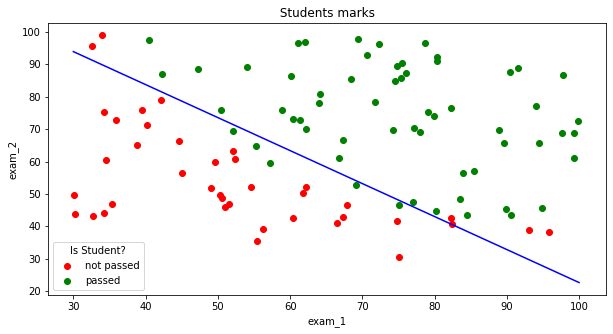

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

for label, group in groups:
    ax.scatter(group['mark_1'], group['mark_2'], c=colors[label], label=labels[label])
ax.set(xlabel='exam_1', ylabel='exam_2', title=' Students marks ')
ax.legend(title='Is Student?')
xo = np.linspace(30, 100, 70)
yo = (theta[0]+theta[1]*xo)/(-theta[2])
plt.plot(xo, yo, 'b', color='blue')
plt.show()

## Task 2

Набор данных ex2data2.txt представляет собой текстовый файл,
содержащий информацию о результате первого теста (первое число в строке)
и результате второго теста (второе число в строке) изделий и результате
прохождения контроля (0 - контроль не пройден, 1 - контроль пройден).

7. Загрузите данные ex2data2.txt из текстового файла.

In [0]:
task2_file_name = "Data\Lab 2\ex2data2.txt"
df_task2 = pd.read_csv(task2_file_name)
df_task2.columns = ['test_1', 'test_2', 'is_passed']

8. Постройте график, где по осям откладываются результаты тестов, а
точки обозначаются двумя разными маркерами в зависимости от того,
прошло ли изделие контроль или нет.


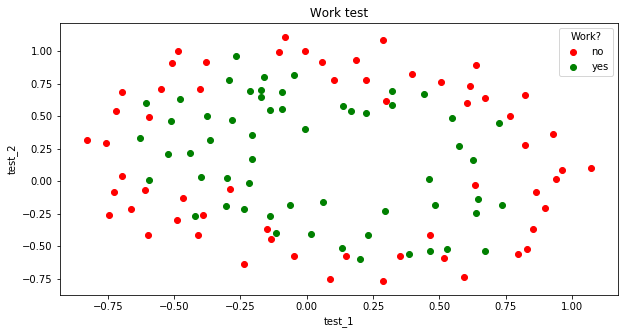

In [0]:
groups_task = df_task2.groupby('is_passed')
colors_task = {0:'red', 1:'green'}
labels_task = {0:'no',  1:'yes'}

fig, ax = plt.subplots(figsize=(10, 5))

for label, group in groups_task:
    ax.scatter(group['test_1'], group['test_2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='test_1', ylabel='test_2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

9. Постройте все возможные комбинации признаков x<sub>1</sub> (результат первого теста) и x<sub>2</sub> (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x<sub>1</sub>, x<sub>2</sub>, x<sub>1</sub><sup>2</sup>, x<sub>1</sub>x<sub>2</sub>, x<sub>2</sub><sup>2</sup>, …, x<sub>1</sub>x<sub>2</sub><sup>5</sup>, x<sub>2</sub><sup>6</sup>(всего 28 комбинаций).


In [0]:
poly = PolynomialFeatures(degree=6).fit(df_task2.iloc[:,:-1])
x = poly.transform(df_task2.iloc[:,:-1])
x = x.T

In [0]:
x.shape

(28, 117)

In [0]:
print("Count of combinations for degree 6 = {}".format(len(poly.get_feature_names())))
print(poly.get_feature_names(['x1', 'x2']))

Count of combinations for degree 6 = 28
['1', 'x1', 'x2', 'x1^2', 'x1 x2', 'x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x1^4', 'x1^3 x2', 'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x1^5', 'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5', 'x1^6', 'x1^5 x2', 'x1^4 x2^2', 'x1^3 x2^3', 'x1^2 x2^4', 'x1 x2^5', 'x2^6']


10.Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска

In [0]:
alpha = 1
koeff_regularization = 0.1
n = x.shape[0] #po y
m = x.shape[1] #po x
y = np.array(df_task2.iloc[:,-1], subok=True, ndmin=2).T
theta = np.random.random((n, 1))

In [0]:
n, m

(28, 117)

In [0]:
def update_regularization_addition(t, l):
    helping_factor = np.ones(theta.shape)
    helping_factor[0] = 0
    return l * t * helping_factor

In [0]:
g = lambda z: 1 / (1 + np.exp(-z))
lost_func = lambda t, x, y, l: (-1 / m) * (
                                 np.dot(y.T,np.log(g(np.dot(t.T, x)).T)) 
                                 + 
                                 np.dot((1 - y).T, np.log(1 - g(np.dot(t.T, x)).T))
                                ) + l*np.sum(np.square(t))/(2*m)
update_func = lambda t, x, y, l: t - (1 / m) * alpha * (np.dot((g(np.dot(t.T, x)).T - y).T, x.T).T + update_regularization_addition(t, l))
J = lambda t,l: lost_func(t.T, x, y, l)
gradiate =  lambda t,l: list((1 / m) * (np.dot((g(np.dot(t, x)).T - y).T, x.T).T + update_regularization_addition(t, l))[0])

In [0]:
def optimize_by_gradient_descent(t, koeff_regularization):
    costs = []
    delta = -1
    step = 1
    for i in range(10000):
        t = update_func(t, x, y, koeff_regularization)
        cost = lost_func(t, x, y, koeff_regularization).item()
        if costs:
            delta = cost - costs[-1]
        costs.append(cost)
        step += 1
        if delta > 0 or abs(delta) < 1e-6:
            break
    return t, step, costs

In [0]:
theta, step, costs = optimize_by_gradient_descent(theta, koeff_regularization)

In [0]:
step, theta

(1145, array([[ 2.67281784],
        [ 1.7912073 ],
        [ 2.81584661],
        [-4.14047804],
        [-3.19181383],
        [-4.03679187],
        [ 0.68177677],
        [-1.07936608],
        [-0.840967  ],
        [-0.36408898],
        [-3.29171173],
        [ 0.26163054],
        [-1.50869308],
        [-0.97446309],
        [-2.61788245],
        [-0.46257546],
        [-0.45643814],
        [ 0.39391481],
        [-1.02275452],
        [-1.06961875],
        [-0.29426951],
        [-2.49906307],
        [ 0.44408117],
        [-0.46511714],
        [ 0.40925245],
        [-1.02560943],
        [-0.73664806],
        [-1.27947991]]))

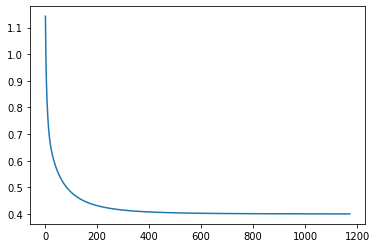

In [0]:
plt.plot(np.array([range(1, step)]).T, costs)
plt.show()

In [0]:
lost_func(theta, x, y, koeff_regularization).item()

0.3999961365726666

11.Реализуйте другие методы оптимизации.

In [0]:
optimize.minimize(J, np.random.random((n, 1)).T, args=(koeff_regularization,), method='Nelder-Mead').x

array([ 2.01199072,  1.38162313,  2.79055516,  0.17247415, -3.78761315,
       -5.00153695,  0.01787399, -1.04102999,  0.13794923, -1.14258003,
       -7.56656921,  1.14534869,  0.32874906, -0.61047192, -0.81733454,
        0.30678197, -0.16546565, -0.47171973, -1.3573978 ,  1.64108722,
        0.17892119, -2.17360032,  0.03214588, -1.86995922,  1.74995914,
        1.44086757,  0.11795792, -0.52394618])

In [0]:
optimize.minimize(J, np.random.random((n, 1)).T, args=(koeff_regularization,), method='BFGS').x

array([ 2.64172819,  1.75214784,  2.86682397, -3.97409612, -3.35742042,
       -4.05537036,  0.78328471, -1.01032504, -0.47379898, -0.48086712,
       -3.29627492,  0.56009976, -1.76402653, -1.17807562, -2.77539737,
       -0.62088806, -0.46083681,  0.61985114, -1.11934045, -1.20669404,
       -0.07508092, -2.68272607,  0.46839717, -0.75659497,  0.44453581,
       -1.15312457, -0.92776478, -1.15273402])

In [0]:
optimize.brute(J, tuple([(-5, 5) for i in range(n)]), args=(koeff_regularization,), disp=True)

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [0]:
res=optimize.differential_evolution(J, tuple([(-5, 5) for i in range(n)]), args=(koeff_regularization,), disp=True)

differential_evolution step 1: f(x)= 0.596595
differential_evolution step 2: f(x)= 0.554506
differential_evolution step 3: f(x)= 0.554506
differential_evolution step 4: f(x)= 0.554506
differential_evolution step 5: f(x)= 0.554506
differential_evolution step 6: f(x)= 0.517585
differential_evolution step 7: f(x)= 0.517585
differential_evolution step 8: f(x)= 0.517585
differential_evolution step 9: f(x)= 0.514451
differential_evolution step 10: f(x)= 0.507531
differential_evolution step 11: f(x)= 0.507531
differential_evolution step 12: f(x)= 0.469144
differential_evolution step 13: f(x)= 0.469144
differential_evolution step 14: f(x)= 0.450917
differential_evolution step 15: f(x)= 0.450917
differential_evolution step 16: f(x)= 0.445944
differential_evolution step 17: f(x)= 0.445944
differential_evolution step 18: f(x)= 0.445944
differential_evolution step 19: f(x)= 0.445944
differential_evolution step 20: f(x)= 0.445944
differential_evolution step 21: f(x)= 0.445944
differential_evolution

In [0]:
res.x

array([ 2.64016634,  1.75029177,  2.86781309, -3.97289112, -3.35207809,
       -4.05106505,  0.78202853, -1.01436538, -0.47251591, -0.48433491,
       -3.29298165,  0.5561111 , -1.75746977, -1.1766514 , -2.7736493 ,
       -0.62146306, -0.46682638,  0.62224405, -1.12176541, -1.20430849,
       -0.07468516, -2.68027037,  0.45764932, -0.76006607,  0.44945542,
       -1.15580944, -0.92803072, -1.15411397])

In [0]:
optimize.check_grad(J, gradiate, theta.T, koeff_regularization)

0.020493033318093348

In [0]:
optimize.check_grad(J, gradiate, np.array(res.x, subok=True, ndmin=2), koeff_regularization)

0.012223942876960159

12.Реализуйте функцию предсказания вероятности прохождения контроля изделием в зависимости от результатов тестов

In [0]:
is_passed = lambda x1, x2: g(np.dot(poly.transform(np.array([[x1, x2]])), theta)).item()

In [0]:
"It's work!" if is_passed(0,0)>=0.5 else "It's not work!"

"It's work!"

In [0]:
hypotetic_func = lambda x, t: g(np.dot(poly.transform(x), t))

13.Постройте разделяющую кривую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 7.

In [0]:
map_h2y = lambda h: 1 if h >= 0.5 else 0
map_h2y = np.vectorize(map_h2y)
groups_task = df_task2.groupby('is_passed')
colors_task = {0:'red', 1:'green'}
labels_task = {0:'no',  1:'yes'}

xx, yy = np.meshgrid(np.arange(-0.85, 1.20, 0.01),
                     np.arange(-0.85, 1.20, 0.01))
X = np.c_[xx.ravel(), yy.ravel()]

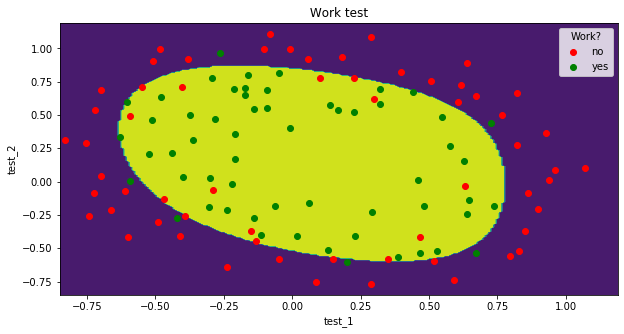

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

h = hypotetic_func(X, theta)
z = map_h2y(h)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['test_1'], group['test_2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='test_1', ylabel='test_2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

14.Попробуйте различные значения параметра регуляризации λ. Как
выбор данного значения влияет на вид разделяющей кривой? Ответ
дайте в виде графиков.

In [0]:
theta_test = np.random.random((n, 1))

$$
\lambda = 0.001
$$

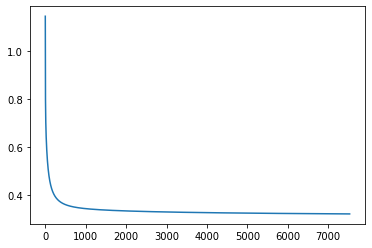

In [0]:
t, step, costs = optimize_by_gradient_descent(theta_test, 0.001)
plt.plot(np.array([range(1, step)]).T, costs)
plt.show()

In [0]:
optimize.check_grad(J, gradiate, t.T, 0.001)

0.0007303227971029045

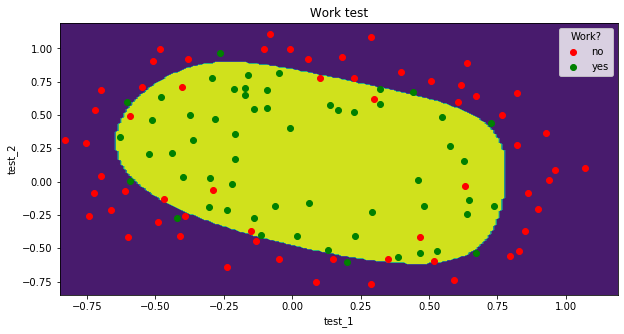

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

h = hypotetic_func(X, t)
z = map_h2y(h)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['test_1'], group['test_2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='test_1', ylabel='test_2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

$$
\lambda = 0.1
$$

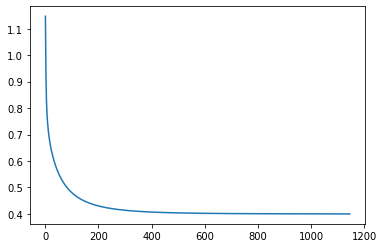

In [0]:
t, step, costs = optimize_by_gradient_descent(theta_test, 0.1)
plt.plot(np.array([range(1, step)]).T, costs)
plt.show()

In [0]:
optimize.check_grad(J, gradiate, t.T, 0.1)

0.020264422703220684

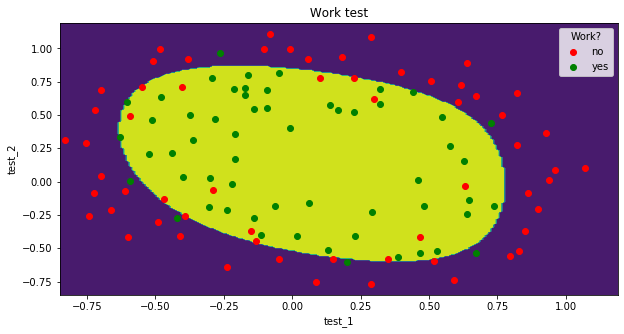

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

h = hypotetic_func(X, t)
z = map_h2y(h)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['test_1'], group['test_2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='test_1', ylabel='test_2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

$$
\lambda = 0.5
$$

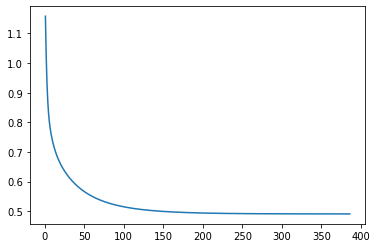

In [0]:
t, step, costs = optimize_by_gradient_descent(theta_test, 0.5)
plt.plot(np.array([range(1, step)]).T, costs)
plt.show()

In [0]:
optimize.check_grad(J, gradiate, t.T, 0.5)

0.06433802369476682

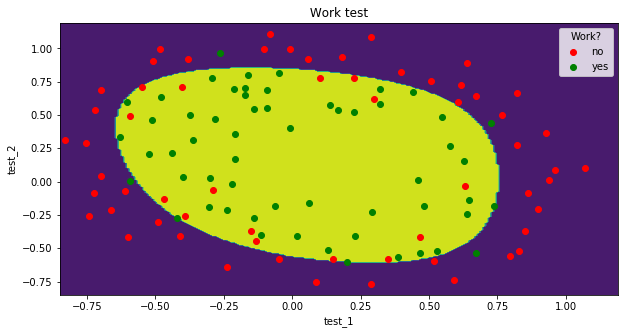

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

h = hypotetic_func(X, t)
z = map_h2y(h)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['test_1'], group['test_2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='test_1', ylabel='test_2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

$$
\lambda = 1.0
$$

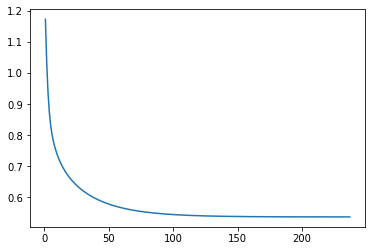

In [0]:
t, step, costs = optimize_by_gradient_descent(theta_test, 1.0)
plt.plot(np.array([range(1, step)]).T, costs)
plt.show()

In [0]:
optimize.check_grad(J, gradiate, t.T, 1.0)

0.09400401226516848

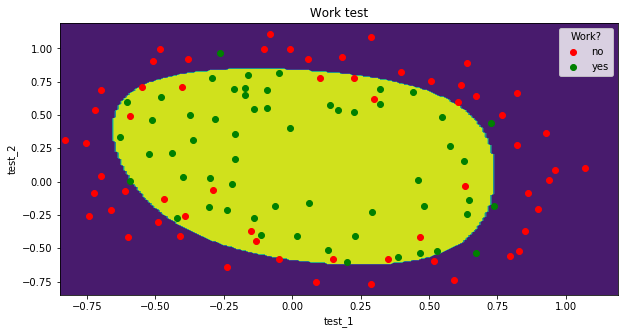

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

h = hypotetic_func(X, t)
z = map_h2y(h)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['test_1'], group['test_2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='test_1', ylabel='test_2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

$$
\lambda = 10.0
$$

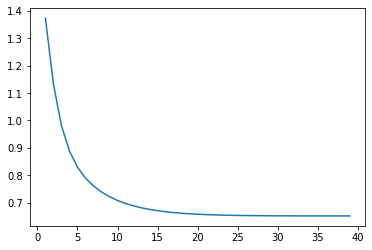

In [0]:
t, step, costs = optimize_by_gradient_descent(theta_test, 10.0)
plt.plot(np.array([range(1, step)]).T, costs)
plt.show()

In [0]:
optimize.check_grad(J, gradiate, t.T, 10.0)

0.23949949128769035

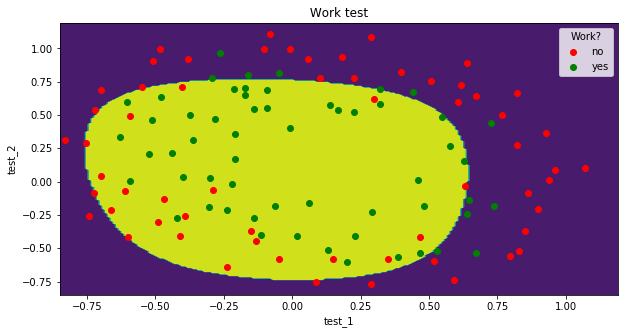

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

h = hypotetic_func(X, t)
z = map_h2y(h)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['test_1'], group['test_2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='test_1', ylabel='test_2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

$$
\lambda = 100.0
$$

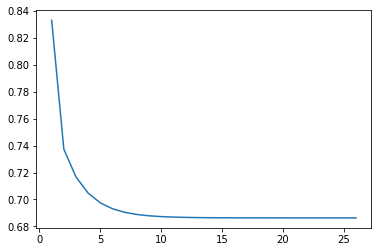

In [0]:
t, step, costs = optimize_by_gradient_descent(theta_test, 100.0)
plt.plot(np.array([range(1, step)]).T, costs)
plt.show()

In [0]:
optimize.check_grad(J, gradiate, t.T, 100.0)

0.02486237282681898

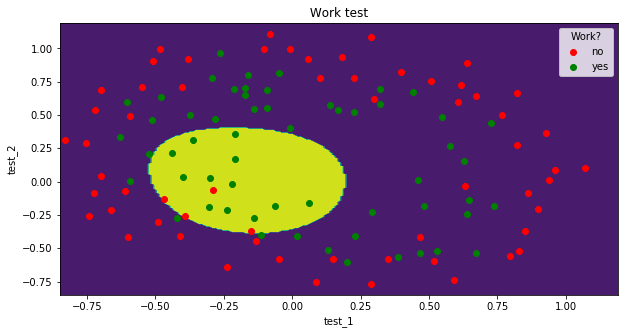

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

h = hypotetic_func(X, t)
z = map_h2y(h)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)

for label, group in groups_task:
    ax.scatter(group['test_1'], group['test_2'], c=colors_task[label], label=labels_task[label])
ax.set(xlabel='test_1', ylabel='test_2', title=' Work test ')
ax.legend(title='Work?')
plt.show()

## Task 3

Набор данных ex2data3.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит 5000 изображений 20x20 в
оттенках серого. Каждый пиксель представляет собой значение яркости
(вещественное число). Каждое изображение сохранено в виде вектора из 400
элементов. В результате загрузки набора данных должна быть получена
матрица 5000x400. Далее расположены метки классов изображений от 1 до 9
(соответствуют цифрам от 1 до 9), а также 10 (соответствует цифре 0).

15.Загрузите данные ex2data3.mat из файла

In [0]:
task3_file_name = "Data\Lab 2\ex2data3.mat"
mat = loadmat(task3_file_name)  # load mat-file
x = mat['X']
y = mat['y']

16.Визуализируйте несколько случайных изображений из набора данных.
Визуализация должна содержать каждую цифру как минимум один раз.

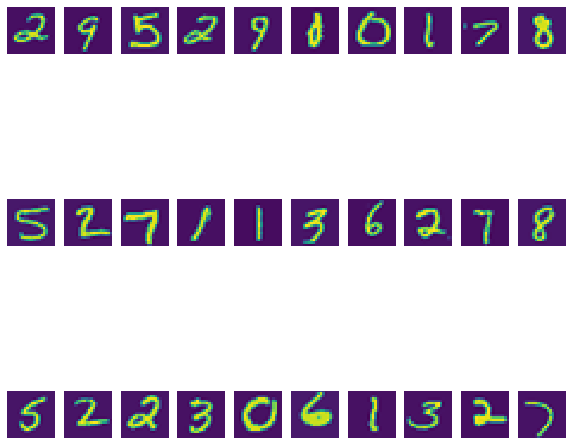

In [0]:
fig, ax = plt.subplots(3,10,figsize=(10,10))
for i in range(3):
    for j in range(10):
        ax[i,j].imshow(x[np.random.randint(x.shape[0])].reshape((20,20), order = 'F'))          
        ax[i,j].axis('off')

17.Реализуйте бинарный классификатор с помощью логистической
регрессии с использованием векторизации (функции потерь и
градиентного спуска).

18.Добавьте L2-регуляризацию к модели.

In [0]:
m = len(y)
ones = np.ones((m,1))
x = np.hstack((ones, x))
(m,n) = x.shape

In [0]:
m, n

(5000, 401)

In [0]:
def update_func(t, x, y, l):
    temp = g(np.dot(t.T, x)).T - y
    temp = alpha * (np.dot(temp.T, x.T).T / m + t * l / m)
    temp[0] = temp[0] - t[0] * alpha * l / m
    return t - temp

In [0]:
g = lambda z: 1 / (1 + np.exp(-z))
lost_func = lambda t, x, y, l: (-1 / m) * (
                                 np.dot(y.T,np.log(g(np.dot(t.T, x)).T)) 
                                 + 
                                 np.dot((1 - y).T, np.log(1 - g(np.dot(t.T, x)).T))
                                ) + l*np.sum(np.square(t))/(2*m)
# update_func = lambda t, x, y, l: t - (1 / m) * alpha * (np.dot((g(np.dot(t.T, x)).T - y).T, x.T).T + update_regularization_addition(t, l))

In [0]:
def optimize_by_gradient_descent(x, y, t, koeff_regularization):
    costs = []
    delta = -1
    step = 1
    for i in range(10000):
        temp = update_func(t, x, y, koeff_regularization)
        cost = lost_func(temp, x, y, koeff_regularization).item()
        if costs:
            delta = cost - costs[-1]
        costs.append(cost)
        step += 1
        if delta > 0:
            break
        t = temp
    plt.plot(np.array([range(1, step)]).T, costs)
    plt.show()
    return t

19.Реализуйте многоклассовую классификацию по методу “один против
всех”.

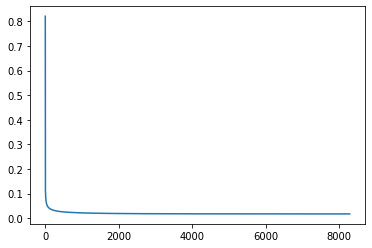

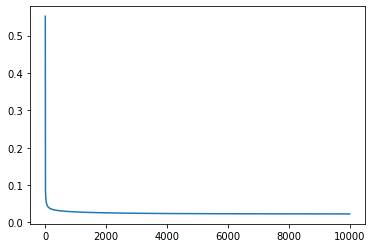

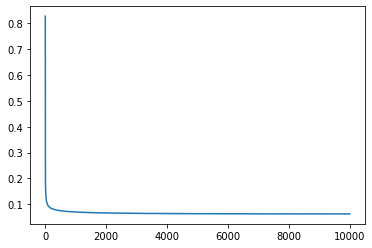

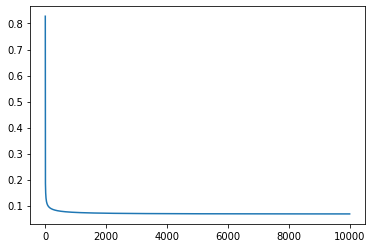

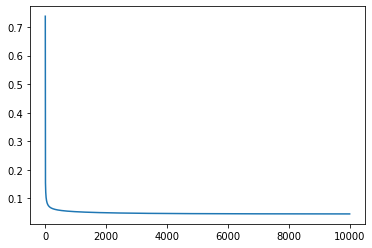

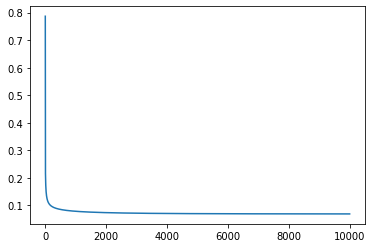

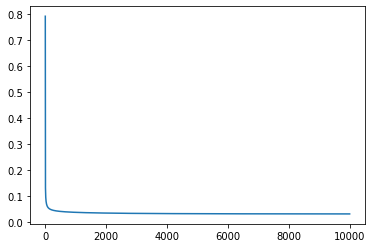

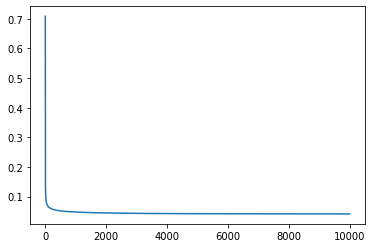

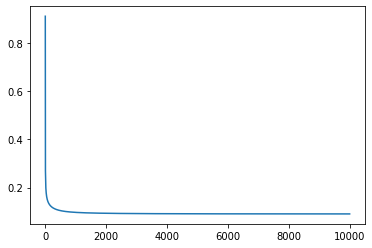

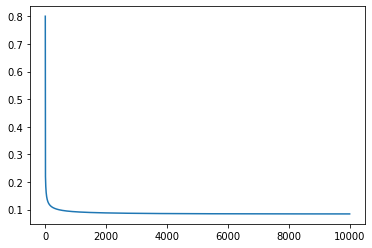

In [0]:
alpha = 1.1
koeff_regularization = 0.5
k = 10
theta = np.zeros((n, k)) #inital parameters
for i in range(k):
    digit_class = i if i else 10
    y_class = np.array((y == digit_class).flatten(), subok=True, ndmin=2).T
    theta_class = np.array(theta[:,i], subok=True, ndmin=2).T
    theta[:,i:i+1] = optimize_by_gradient_descent(x.T, y_class, theta_class, koeff_regularization)

20.Реализуйте функцию предсказания класса по изображению с
использованием обученных классификаторов.

In [0]:
hypotetic_func = lambda x, t: g(np.dot(x, t))

21.Процент правильных классификаций на обучающей выборке должен
составлять около 95%.

In [0]:
pred = np.argmax(hypotetic_func(x, theta), axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(cccc) * 100

94.76